In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yaml, sys
import csv
from resistors_utils import V2power

In [2]:
runsToPlot = [2,3,4]

In [5]:
samples = yaml.load(open('samples/runs.yml'), Loader=yaml.FullLoader)
sysCond = yaml.load(open('samples/systemConditions.yml'), Loader=yaml.FullLoader)


res = {}
for r in runsToPlot:
    run_name = 'run'+str(r)
    dset = samples[run_name]
    cond = sysCond[dset['conditions']]
    support = cond['support']
    if not support in res.keys():
        res[support] = {'dTL': [], 'dTC': [], 'dTR': [], 'T':[]}
    
    csvname = 'results/'+run_name+'.txt'
    csvfile = open(csvname, 'r')
    reader = csv.DictReader(csvfile)
    
    for row in reader:
        if row['# '] == 'Cooldiff':
            res[support]['T'].append(dset['temp'])
            res[support]['dTL'].append(float(row['pkg L']))
            res[support]['dTC'].append(float(row['pkg C']))
            res[support]['dTR'].append(float(row['pkg R border']))
            break

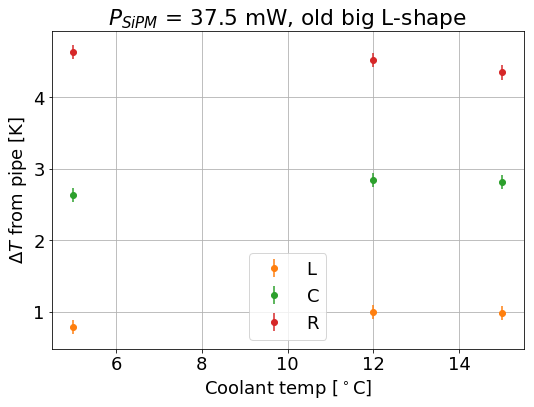

In [12]:
plt.rcParams.update({'font.size': 18})
fig = plt.figure(figsize=(8,6))
colors = {'L':'1', 'C':'2', 'R':'3'}
marker = ['o', '+', 'v', 'x']

for i, (shape, dic) in enumerate(res.iteritems()):
    for side in 'LCR':
        plt.errorbar(np.array(dic['T']), dic['dT'+side], [0.1]*len(dic['T']), fmt=marker[i], color='C'+colors[side], label=side)

plt.legend(loc='best')
plt.xlabel(r'Coolant temp [$^\circ$C]')
plt.ylabel(r'$\Delta T$ from pipe [K]')
plt.grid(axis='x')
plt.grid(axis='y')
# plt.xlim(-0.5, 6)
plt.title(r'$P_{SiPM}$ = 37.5 mW, old big L-shape')
plt.tight_layout()
plt.savefig('./fig/191210_temperatureDrift.png')